In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import scanpy as sc
import scanpy_scripts as ss
import bbknn

np.set_printoptions(linewidth=180)
sc.settings.verbosity = 1
expr_cmap = ss.lib.expression_colormap()
ss.lib.set_figsize((4, 4))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import gc

In [3]:
!ls ../20200403_post_annot3_cleanup/*.h5ad

../20200403_post_annot3_cleanup/fetal_skin.endothelium.doublet_removed_processed.20200403.h5ad
../20200403_post_annot3_cleanup/fetal_skin.erythroid.doublet_removed_processed.20200403.h5ad
../20200403_post_annot3_cleanup/fetal_skin.keratinocytes.doublet_removed_processed.20200403.h5ad
../20200403_post_annot3_cleanup/fetal_skin.lymphoid_B.doublet_removed_processed.20200403.h5ad
../20200403_post_annot3_cleanup/fetal_skin.lymphoid_T_NK.doublet_removed_processed.20200403.h5ad
../20200403_post_annot3_cleanup/fetal_skin.mast_cells.doublet_removed_processed.20200403.h5ad
../20200403_post_annot3_cleanup/fetal_skin.melanocytes.doublet_removed_processed.20200403.h5ad
../20200403_post_annot3_cleanup/fetal_skin.myeloid.doublet_removed_processed.20200403.h5ad


In [4]:
h5ads = !ls ../20200403_post_annot3_cleanup/*.h5ad

In [5]:
h5ads.append('../20200615_stroma_pass2/fetal_skin.stroma_cells_pass2.processed.annotated.cellxgene.h5ad')

In [12]:
# ad1 = sc.read('../20200401_cellbender/fetal_skin.cellbender.filtered.h5ad', backed=True)
# ad1.obs_names[0:10]

In [6]:
ad1 = sc.read('../data/h5ad/fetal_skin_bbknn.h5ad')

In [7]:
ads = [sc.read(h5ad, backed='r') for h5ad in h5ads]

Only considering the two last: ['.20200403', '.h5ad'].
Only considering the two last: ['.20200403', '.h5ad'].
Only considering the two last: ['.20200403', '.h5ad'].
Only considering the two last: ['.20200403', '.h5ad'].
Only considering the two last: ['.20200403', '.h5ad'].
Only considering the two last: ['.20200403', '.h5ad'].
Only considering the two last: ['.20200403', '.h5ad'].
Only considering the two last: ['.20200403', '.h5ad'].
Only considering the two last: ['.20200403', '.h5ad'].
Only considering the two last: ['.20200403', '.h5ad'].
Only considering the two last: ['.20200403', '.h5ad'].
Only considering the two last: ['.20200403', '.h5ad'].
Only considering the two last: ['.20200403', '.h5ad'].
Only considering the two last: ['.20200403', '.h5ad'].
Only considering the two last: ['.20200403', '.h5ad'].
Only considering the two last: ['.20200403', '.h5ad'].
Only considering the two last: ['.cellxgene', '.h5ad'].
Only considering the two last: ['.cellxgene', '.h5ad'].


In [8]:
annot_dfs = []
for ad in ads:
    if 'nh3_annot1' in ad.obs_keys():
        annot_col = 'nh3_annot1'
    elif 'rachel_annot3' in ad.obs_keys():
        annot_col = 'rachel_annot3'
    elif 'rachel_annot2' in ad.obs_keys():
        annot_col = 'rachel_annot2'
    print((ad.filename, annot_col))
    annot_dfs.append(ad.obs[[annot_col]].rename(columns={annot_col: 'celltype'}))

(PosixPath('../20200403_post_annot3_cleanup/fetal_skin.endothelium.doublet_removed_processed.20200403.h5ad'), 'rachel_annot3')
(PosixPath('../20200403_post_annot3_cleanup/fetal_skin.erythroid.doublet_removed_processed.20200403.h5ad'), 'rachel_annot3')
(PosixPath('../20200403_post_annot3_cleanup/fetal_skin.keratinocytes.doublet_removed_processed.20200403.h5ad'), 'rachel_annot3')
(PosixPath('../20200403_post_annot3_cleanup/fetal_skin.lymphoid_B.doublet_removed_processed.20200403.h5ad'), 'rachel_annot3')
(PosixPath('../20200403_post_annot3_cleanup/fetal_skin.lymphoid_T_NK.doublet_removed_processed.20200403.h5ad'), 'rachel_annot3')
(PosixPath('../20200403_post_annot3_cleanup/fetal_skin.mast_cells.doublet_removed_processed.20200403.h5ad'), 'rachel_annot3')
(PosixPath('../20200403_post_annot3_cleanup/fetal_skin.melanocytes.doublet_removed_processed.20200403.h5ad'), 'rachel_annot3')
(PosixPath('../20200403_post_annot3_cleanup/fetal_skin.myeloid.doublet_removed_processed.20200403.h5ad'), 'rach

In [10]:
annot_df = pd.concat(annot_dfs, axis=0)

In [11]:
k = ad1.obs_names.isin(annot_df.index)

In [12]:
ad2 = ad1[k, :].copy()

In [22]:
annot_df1 = ad2.obs.merge(annot_df, how='left', left_index=True, right_index=True)[['celltype']]

In [23]:
annot_df1.shape

(187711, 1)

In [25]:
np.all(annot_df1.index == ad2.obs_names)

True

In [26]:
ad2.obs['celltype'] = annot_df1.celltype.values
ad2.obs['celltype'] = ad2.obs['celltype'].astype('category')

In [27]:
ad2

AnnData object with n_obs × n_vars = 187711 × 28885 
    obs: 'bh_doublet_pval', 'cell_caller', 'cluster_scrublet_score', 'doublet_pval', 'mt_prop', 'n_counts', 'n_genes', 'sanger_id', 'scrublet_score', 'chemistry', 'donor', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'percent_mito', 'percent_ribo', 'percent_hb', 'leiden_r0_1', 'leiden_r0_3', 'leiden_r0_5', 'leiden_r0_7', 'leiden_r1_5', 'doublet', 'annot', 'lr_annot', 'leiden_r0_3_annot', 'leiden_r0_1_annot', 'hierarchy1', 'leiden_r1_5_annot', 'celltype'
    var: 'gene_ids', 'mito', 'ribo', 'hb', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_caller_colors', 'chemistry_colors', 'chemistry_sorting_colors', 'donor_colors', 'doublet_colors', 'hierarchy1_colors', 'leiden', 'leiden_r0_1_annot_colors', 'leiden_r0_3_annot_colors', 'leiden_r1_5_annot_colors', 'neighbors', 'pca', 'sorting_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'

In [41]:
ad2.obs['annotation'] = ad2.obs.celltype.str.replace('?', '').values

In [44]:
ad2.obs['annotation'] = ad2.obs['annotation'].astype('category')

In [37]:
k1 = ad2.obs.celltype.str.contains('doublet').values

In [38]:
k1.sum()

418

In [48]:
ad3 = ad2[~k1, :]

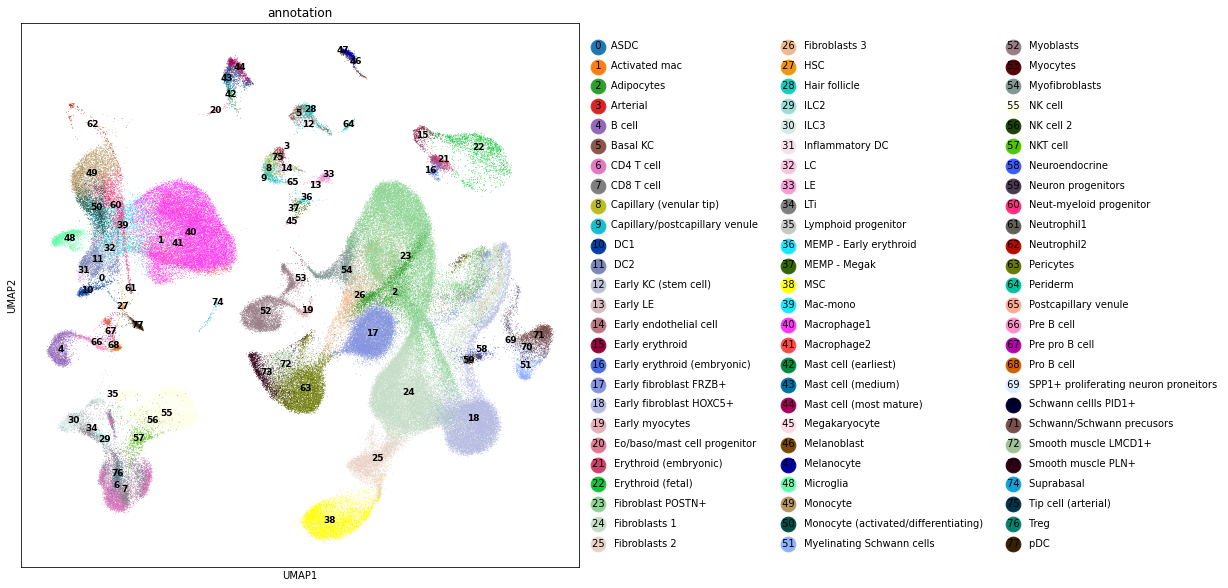

In [11]:
ss.lib.plot_embedding(ad3, basis='umap', groupby='annotation', figsize=(10, 10), size=2)#, save='fetal_skin.annotated.UMAP.png')

In [56]:
for k in list(ad3.uns.keys()):
    del ad3.uns[k]

In [57]:
ad3

AnnData object with n_obs × n_vars = 187293 × 28885 
    obs: 'bh_doublet_pval', 'cell_caller', 'cluster_scrublet_score', 'doublet_pval', 'mt_prop', 'n_counts', 'n_genes', 'sanger_id', 'scrublet_score', 'chemistry', 'donor', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'percent_mito', 'percent_ribo', 'percent_hb', 'leiden_r0_1', 'leiden_r0_3', 'leiden_r0_5', 'leiden_r0_7', 'leiden_r1_5', 'doublet', 'annot', 'lr_annot', 'leiden_r0_3_annot', 'leiden_r0_1_annot', 'hierarchy1', 'leiden_r1_5_annot', 'celltype', 'annotation'
    var: 'gene_ids', 'mito', 'ribo', 'hb', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'

In [4]:
ad3

AnnData object with n_obs × n_vars = 187293 × 28885 backed at 'fetal_skin_bbknn.annotated.20200626.h5ad'
    obs: 'bh_doublet_pval', 'cell_caller', 'cluster_scrublet_score', 'doublet_pval', 'mt_prop', 'n_counts', 'n_genes', 'sanger_id', 'scrublet_score', 'chemistry', 'donor', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'percent_mito', 'percent_ribo', 'percent_hb', 'leiden_r0_1', 'leiden_r0_3', 'leiden_r0_5', 'leiden_r0_7', 'leiden_r1_5', 'doublet', 'annot', 'lr_annot', 'leiden_r0_3_annot', 'leiden_r0_1_annot', 'hierarchy1', 'leiden_r1_5_annot', 'celltype', 'annotation'
    var: 'gene_ids', 'mito', 'ribo', 'hb', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'

In [6]:
ad3.obs.annotation.cat.categories

Index(['ASDC', 'Activated mac', 'Adipocytes', 'Arterial', 'B cell', 'Basal KC',
       'CD4 T cell', 'CD8 T cell', 'Capillary (venular tip)',
       'Capillary/postcapillary venule', 'DC1', 'DC2', 'Early KC (stem cell)',
       'Early LE', 'Early endothelial cell', 'Early erythroid',
       'Early erythroid (embryonic)', 'Early fibroblast FRZB+',
       'Early fibroblast HOXC5+', 'Early myocytes',
       'Eo/baso/mast cell progenitor', 'Erythroid (embryonic)',
       'Erythroid (fetal)', 'Fibroblast POSTN+', 'Fibroblasts 1',
       'Fibroblasts 2', 'Fibroblasts 3', 'HSC', 'Hair follicle', 'ILC2',
       'ILC3', 'Inflammatory DC', 'LC', 'LE', 'LTi', 'Lymphoid progenitor',
       'MEMP - Early erythroid', 'MEMP - Megak', 'MSC', 'Mac-mono',
       'Macrophage1', 'Macrophage2', 'Mast cell (earliest)',
       'Mast cell (medium)', 'Mast cell (most mature)', 'Megakaryocyte',
       'Melanoblast', 'Melanocyte', 'Microglia', 'Monocyte',
       'Monocyte (activated/differentiating)', 'Myelinati

In [58]:
ad3.write('fetal_skin_bbknn.annotated.20200626.h5ad', compression='lzf')

In [3]:
ad3 = sc.read('fetal_skin_bbknn.annotated.20200626.h5ad', backed='r')

Only considering the two last: ['.20200626', '.h5ad'].
Only considering the two last: ['.20200626', '.h5ad'].


In [6]:
meta_df = pd.read_csv('../20200713_cellphonedb/fetal_skin.annotated.metadata.20200720.csv')

In [11]:
ad3

AnnData object with n_obs × n_vars = 187293 × 28885 backed at 'fetal_skin_bbknn.annotated.20200626.h5ad'
    obs: 'bh_doublet_pval', 'cell_caller', 'cluster_scrublet_score', 'doublet_pval', 'mt_prop', 'n_counts', 'n_genes', 'sanger_id', 'scrublet_score', 'chemistry', 'donor', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'percent_mito', 'percent_ribo', 'percent_hb', 'leiden_r0_1', 'leiden_r0_3', 'leiden_r0_5', 'leiden_r0_7', 'leiden_r1_5', 'doublet', 'annot', 'lr_annot', 'leiden_r0_3_annot', 'leiden_r0_1_annot', 'hierarchy1', 'leiden_r1_5_annot', 'celltype', 'annotation'
    var: 'gene_ids', 'mito', 'ribo', 'hb', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'

In [10]:
ad3.obs.merge(meta_df, how='left', left_index=True, right_index=True).annot_y

index
AAACCTGGTCAGTGGA-1-4834STDY7002879    NaN
AAAGATGGTCGATTGT-1-4834STDY7002879    NaN
AAAGCAAAGATGTGGC-1-4834STDY7002879    NaN
AAAGTAGCAGATCGGA-1-4834STDY7002879    NaN
AAAGTAGTCCGCATCT-1-4834STDY7002879    NaN
                                     ... 
TTTGTCAAGTGAACGC-1-FCAImmP7964510     NaN
TTTGTCAGTGCGAAAC-1-FCAImmP7964510     NaN
TTTGTCATCCATGAGT-1-FCAImmP7964510     NaN
TTTGTCATCGCAAGCC-1-FCAImmP7964510     NaN
TTTGTCATCTGCTTGC-1-FCAImmP7964510     NaN
Name: annot_y, Length: 187293, dtype: object

In [59]:
ad3s = ss.lib.subsample(ad3, 0.05, groupby='annotation', min_n=200, max_n=500)

In [60]:
ad3s

View of AnnData object with n_obs × n_vars = 15871 × 28885 
    obs: 'bh_doublet_pval', 'cell_caller', 'cluster_scrublet_score', 'doublet_pval', 'mt_prop', 'n_counts', 'n_genes', 'sanger_id', 'scrublet_score', 'chemistry', 'donor', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'percent_mito', 'percent_ribo', 'percent_hb', 'leiden_r0_1', 'leiden_r0_3', 'leiden_r0_5', 'leiden_r0_7', 'leiden_r1_5', 'doublet', 'annot', 'lr_annot', 'leiden_r0_3_annot', 'leiden_r0_1_annot', 'hierarchy1', 'leiden_r1_5_annot', 'celltype', 'annotation'
    var: 'gene_ids', 'mito', 'ribo', 'hb', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'

In [62]:
np.expm1(ad3s.raw.X[0:10, :]).sum(axis=1)

matrix([[10006.766],
        [10001.557],
        [10003.879],
        [10001.622],
        [10008.709],
        [10124.75 ],
        [10001.907],
        [10003.484],
        [10003.11 ],
        [10002.391]], dtype=float32)

In [64]:
ad3s.layers['counts'].shape

(15871, 28885)

In [93]:
ad3s.X = ss.lib.lognorm_to_counts(ad3s.raw.X)

In [94]:
ad3s.write('fetal_skin_bbknn.annotated.20200626.downsampled.raw.h5ad', compression='lzf')

In [6]:
ad3 = sc.read('fetal_skin_bbknn.annotated.20200626.h5ad', backed='r')

Only considering the two last: ['.20200626', '.h5ad'].
Only considering the two last: ['.20200626', '.h5ad'].


In [12]:
ad3s = sc.read('fetal_skin_bbknn.annotated.20200626.downsampled.raw.h5ad')

Only considering the two last: ['.raw', '.h5ad'].
Only considering the two last: ['.raw', '.h5ad'].


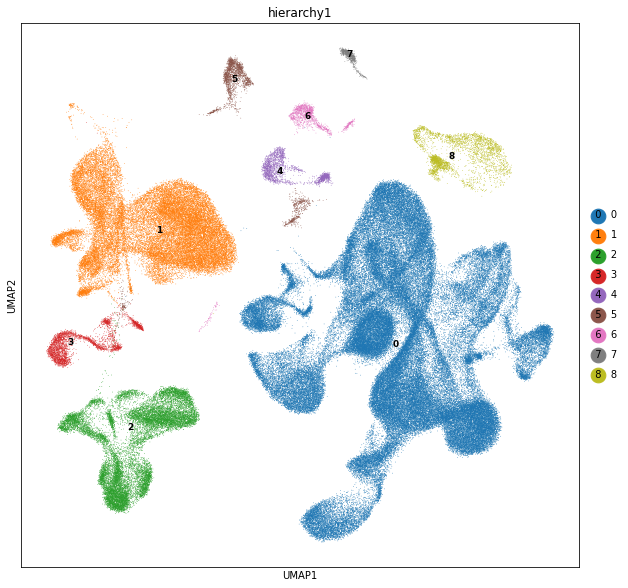

In [8]:
ss.lib.plot_embedding(ad3, basis='umap', groupby='hierarchy1', figsize=(10, 10), size=2)

In [19]:
ss.lib.diffexp(ad3s, groupby='annotation', filter_params=[0.4, 0.1, 2]);

/home/ubuntu/miniconda/envs/scrna/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/ubuntu/miniconda/envs/scrna/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/ubuntu/miniconda/envs/scrna/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [ ]:
markers = ['CDK1', 'FOXP3', 'CD40LG', 'SLC4A10', 'CD8B', 'KLRC2', 'KRT81', 'CCR6', 'LST1', 'MS4A1', 'SCT', 'TNFRSF17', 'JCHAIN',
           'FOLR2', 'CLEC9A', 'CLEC10A', 'LAMP3', 'CD207', 'TPSB2',
           'SOX6', 'KRT15', 'KRT1', 'LY6D', 'LCN2', 'PIGR', 'PIFO', 'TFF3', 'ODAM', 'FOXI1',
           'CCL21', 'PLVAP', 'ACKR1', 'PGF', 'ESM1', 'FBLN5',
           'HBA2',
           'ACTA2', 'ACTG2', 'RGS5',
           'COL3A1',
           'S100B', 'MPZ', 'NRXN1']